# 1. Install and Import Dependencies

In [1]:
# !pip install torch torchvision torchaudio

In [2]:
# !git clone https://github.com/ultralytics/yolov5

In [3]:
# !cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model custom

In [2]:
# !pip install ipywidgets

In [3]:
# !pip install tqdm==4.55

In [2]:
import uuid   # Unique identifier
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['Airline_name', 'Passenger_name', 'Flight_number', 'Gate_no']

In [4]:
# to train the model
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\hc/.cache\torch\hub\master.zip
YOLOv5  2022-2-17 torch 1.10.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 


C:\Users\hc\Training\Seasia\Obj_det_Yolo_v1\yolo_v1\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/1: 1140x1140 1 Airline_name, 2 Passenger_names, 1 Flight_number, 1 Gate_no
Speed: 72.0ms pre-process, 537.7ms inference, 48.0ms NMS per image at shape (1, 3, 640, 640)


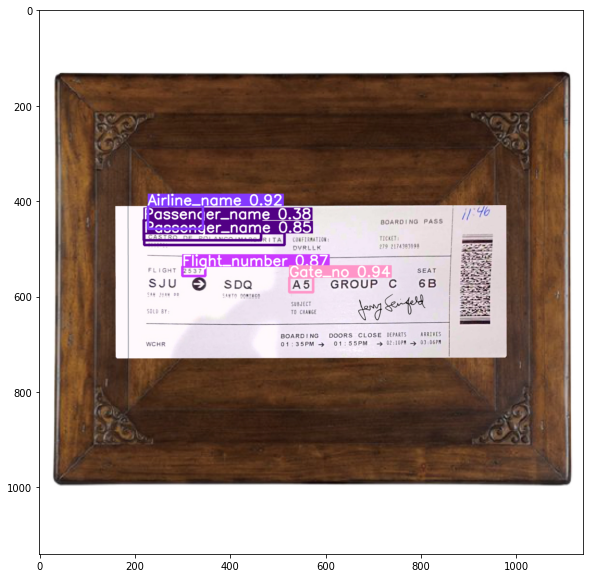

In [6]:
%matplotlib inline
img = os.path.join('data', 'test', '83.jpg')
results = model(img)
results.print()

plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
!python yolov5/detect.py --source data/test/ --weights yolov5/runs/train/exp2/weights/last.pt --conf 0.25 --name detections

detect: weights=['yolov5/runs/train/exp2/weights/last.pt'], source=data/test/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=detections, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.0-124-g1075488 torch 1.10.0+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients, 16.0 GFLOPs
image 1/3 C:\Users\hc\Training\Seasia\Obj_det_Yolo_v1\data\test\80.jpg: 480x640 1 Flight_number, Done. (0.393s)
image 2/3 C:\Users\hc\Training\Seasia\Obj_det_Yolo_v1\data\test\83.jpg: 640x640 1 Airline_name, 2 Passenger_names, 1 Flight_number, 1 Gate_no, Done. (0.671s)
image 3/3 C:\Users\hc\Training\Seasia\Obj_det_Yolo_v1\data\test\86.jpg: 640x640 2 Flight_numbers, Done. (0.597s)
Speed: 1.7ms pre-process, 553

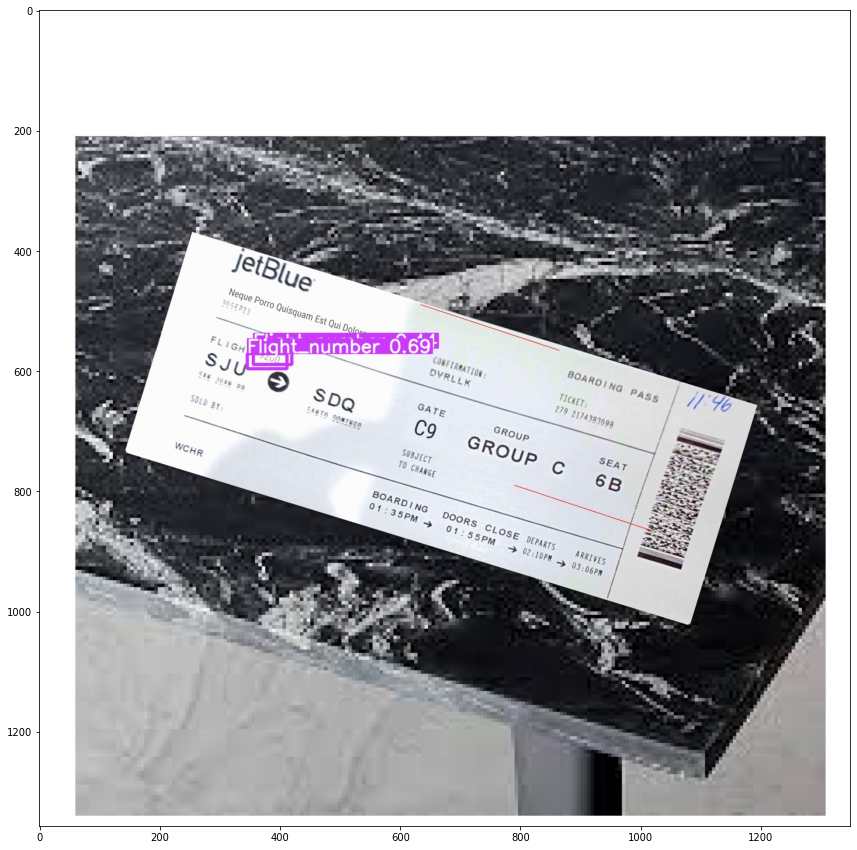

In [10]:
from PIL import Image, ImageDraw
import random
import shutil

detections_dir = "yolov5/runs/detect/detections/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

plt.figure(figsize=(25,15))
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [21]:
#IMAGE_PATH = os.path.join('stimg1.jpg')
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf


img = cv2.imread('86.jpg')
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
print(input_tensor.shape)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()


viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.2,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

(1, 1357, 1349, 3)


NameError: name 'detect_fn' is not defined

In [8]:
import easyocr

In [9]:
detection_threshold = 0.23

In [10]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

NameError: name 'image_np_with_detections' is not defined

In [7]:
classes

NameError: name 'classes' is not defined

In [ ]:
len(classes)

In [ ]:
boxes

In [ ]:
width = image.shape[1]
height = image.shape[0]

In [ ]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(idx)
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    rows = 2
    plt.subplot(rows,3,idx+1)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [ ]:
#IMAGE_PATH = os.path.join('stimg1.jpg')
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


img = cv2.imread('18.jpg')
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
print(input_tensor.shape)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()


viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.2,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()